# Predicting Employment of Students at an University Campus   

## Phase 1: Data Pre-processing, Exploration, and Visualisation 

### Group 46
### Zhaojin Liu s3206722, Martin Thu s3494324, Klara Vickov s3873315

## Table of Contents
- [Introduction](#intro)
    - [Dataset Source](#ds)
    - [Dataset Details](#dd)
    - [Dataset Features](#df)
    - [Target Feature](#tf)
- [Goals and Objectives](#go)
- [Data Cleaning and Preprocessing](#dcp)
    - [Drop ID-like columns](#id)
    - [Change feature names](#names)
    - [Check for missing and incorrect numerical values](#numval)
    - [Check for incorrect categorical values](#catval)
    - [Random Sampling](#rs)
- [Data Exploration and Visualisation](#dev)
- [Literature Review](#lr)
- [Summary and Conclusions](#sum)
- [References](#ref)

## Introduction <a id='intro'></a>

### Dataset Source <a id='ds'></a>
The dataset was sourced from Kaggle (Roshan, 2020). It was used at Jain University in India for coding practice for Master of Business Administration students. It contains various academic information about students at a university that determines whether they received a placement after university and, if they did, their starting salary.

### Dataset Details <a id='dd'></a>
The campus recruitment dataset is about students at a university in India who are looking to get a work placement out of university. If a student was placed, then their salary is also listed. Various features are stored for each student including secondary (10th grade) and higher secondary (12th grade) percentage grade, degree type and specialisation, work experience, and employability test scores.

The dataset contains 215 observations and 15 features.

Below, we read in the dataset from GitHub, import the modules necessary for this project, and print 10 random observations.

In [1]:
import pandas as pd 
import requests
import numpy as np
import io

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) 

df_url = 'https://raw.githubusercontent.com/kvick1/ML_A1/main/Placement_Data_Full_Class.csv'
url_content = requests.get(df_url, verify=False).content
placement = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [2]:
placement.sample(n=10, random_state=999).style.set_precision(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
148,149,F,77.000,Central,86.000,Central,Arts,56.000,Others,No,57.000,Mkt&Fin,64.080,Placed,240000.000
191,192,M,67.000,Others,61.000,Central,Science,72.000,Comm&Mgmt,No,72.000,Mkt&Fin,61.010,Placed,264000.000
125,126,F,84.000,Central,73.000,Central,Commerce,73.000,Comm&Mgmt,No,75.000,Mkt&Fin,73.330,Placed,350000.000
68,69,F,69.700,Central,47.000,Central,Commerce,72.700,Sci&Tech,No,79.000,Mkt&HR,59.240,Not Placed,nan
187,188,M,78.500,Central,65.500,Central,Science,67.000,Sci&Tech,Yes,95.000,Mkt&Fin,64.860,Placed,280000.000
91,92,M,52.000,Central,57.000,Central,Commerce,50.800,Comm&Mgmt,No,67.000,Mkt&HR,62.790,Not Placed,nan
174,175,M,73.240,Others,50.830,Others,Science,64.270,Sci&Tech,Yes,64.000,Mkt&Fin,66.230,Placed,500000.000
7,8,M,82.000,Central,64.000,Central,Science,66.000,Sci&Tech,Yes,67.000,Mkt&Fin,62.140,Placed,252000.000
122,123,F,66.500,Central,66.800,Central,Arts,69.300,Comm&Mgmt,Yes,80.400,Mkt&Fin,71.000,Placed,236000.000
47,48,M,63.000,Central,60.000,Central,Commerce,57.000,Comm&Mgmt,Yes,78.000,Mkt&Fin,54.550,Placed,204000.000


We confirm the number of observations and features below.

In [3]:
placement.shape

(215, 15)

### Dataset Features <a id='df'></a>
For the project, 14 out of 15 features will be included. The salary feature will not be included in the project because it is only relevant for students who have received a placement. As the model will only be looking at status of placement as the target feature placement, the salary amount is irrelevant. 

First, we remove the salary feature from the data frame.
Then, we create a table to explain all the included features.

In [4]:
placement = placement.drop(columns=['salary'])

In [5]:
placement.head().style.set_precision(3)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.000,Others,91.000,Others,Commerce,58.000,Sci&Tech,No,55.000,Mkt&HR,58.800,Placed
1,2,M,79.330,Central,78.330,Others,Science,77.480,Sci&Tech,Yes,86.500,Mkt&Fin,66.280,Placed
2,3,M,65.000,Central,68.000,Central,Arts,64.000,Comm&Mgmt,No,75.000,Mkt&Fin,57.800,Placed
3,4,M,56.000,Central,52.000,Central,Science,52.000,Sci&Tech,No,66.000,Mkt&HR,59.430,Not Placed
4,5,M,85.800,Central,73.600,Central,Commerce,73.300,Comm&Mgmt,No,96.800,Mkt&Fin,55.500,Placed


In [6]:
feature_name = placement.columns.values
feature_name

array(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation',
       'mba_p', 'status'], dtype=object)

In [7]:
placement.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
dtype: object

In [8]:
data_types = []

for i in placement.dtypes:
    if i == "int64" or i == "float64":
        data_types.append("numeric")
    if i == "object":
        data_types.append("nominal categorical")
data_types

['numeric',
 'nominal categorical',
 'numeric',
 'nominal categorical',
 'numeric',
 'nominal categorical',
 'nominal categorical',
 'numeric',
 'nominal categorical',
 'nominal categorical',
 'numeric',
 'nominal categorical',
 'numeric',
 'nominal categorical']

In [9]:
units = []
for i in placement.dtypes:
    if i == 'object':
        units.append('NA')
    elif i == 'int64':
        units.append('NA')
    else:
        units.append('%')      
units

['NA', 'NA', '%', 'NA', '%', 'NA', 'NA', '%', 'NA', 'NA', '%', 'NA', '%', 'NA']

In [10]:
description = ['Serial number', 'M - male; F - female', 'Secondary education percentage in 10th grade', 'Board of Education in 10th grade - central/others', 'Higher secondary education percentage in 12th grade', 
              'Board of education in 12th grade - central/others', 'Specialisation in higher secondary education (Commerce, Science, Other)', 'Undergraduate degree grade percentage',
              'Undergraduate degree type - field of degree education', 'Yes - work experience completed; No - work experience not completed',
              'Employability test percentage, conducted by college', 'Post-graduate (MBA) specialisation. Mkt&Fin - marketing and finance; Mkt&HR - markerting and human resources',
              'Post-graduate (MBA) grade percentage', 'Placed - received placement; Not Placed - not received placement']
description

['Serial number',
 'M - male; F - female',
 'Secondary education percentage in 10th grade',
 'Board of Education in 10th grade - central/others',
 'Higher secondary education percentage in 12th grade',
 'Board of education in 12th grade - central/others',
 'Specialisation in higher secondary education (Commerce, Science, Other)',
 'Undergraduate degree grade percentage',
 'Undergraduate degree type - field of degree education',
 'Yes - work experience completed; No - work experience not completed',
 'Employability test percentage, conducted by college',
 'Post-graduate (MBA) specialisation. Mkt&Fin - marketing and finance; Mkt&HR - markerting and human resources',
 'Post-graduate (MBA) grade percentage',
 'Placed - received placement; Not Placed - not received placement']

In [11]:
table = pd.DataFrame({"Name": feature_name,
                             "Data type":  data_types,
                             "Units": units,
                             "Description": description})
table.style.hide_index()

Name,Data type,Units,Description
sl_no,numeric,NA,Serial number
gender,nominal categorical,NA,M - male; F - female
ssc_p,numeric,%,Secondary education percentage in 10th grade
ssc_b,nominal categorical,NA,Board of Education in 10th grade - central/others
hsc_p,numeric,%,Higher secondary education percentage in 12th grade
hsc_b,nominal categorical,NA,Board of education in 12th grade - central/others
hsc_s,nominal categorical,NA,"Specialisation in higher secondary education (Commerce, Science, Other)"
degree_p,numeric,%,Undergraduate degree grade percentage
degree_t,nominal categorical,NA,Undergraduate degree type - field of degree education
workex,nominal categorical,NA,Yes - work experience completed; No - work experience not completed


### Target Feature <a id='tf'></a>
The feature chosen to be the target feature is 'status'. This feature states whether a student did or did not receive a placement. It is a categorical feature and will be predicted in Phase 2 of the project based off all the other features in the dataset.

## Goals and Objectives <a id='go'></a>
The overall goal of is to be able to predict which students will get placed in a job after graduating from the university in India. Through our modeling, we hope to find which features are most indicative of whether a student will get placed. 

Knowing this information will help both students and the university. For students, it will mean they know what aspects of their education to focus on in order to increase their chances of getting placed after university. For universities, this will be helpful in determining where to direct their time and money. It could mean advertising for more work experience, placing more funding in certain degree specialisations, or even working with a different Board of Education.

## Data Cleaning and Preprocessing <a id='dcp'></a>
We will undertake several data cleaning and preprocessing steps to prepare the data for modeling in Phase 2 of the project.
Looking through the dataset features, it is clear that the column, sl_no, is just an identification number for each student. As such, we will not be using it for our modeling. Rather than completely removing it, we will simply turn it into the index column and remove its name.

### Drop ID-like columns <a id='id'></a>

In [12]:
placement.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status'],
      dtype='object')

In [13]:
placement.rename(columns = {'sl_no': ''},inplace = True)
placement.set_index('', inplace = True)

### Change feature names <a id='names'></a>

All other features will be used in the project, so we do not remove them. The feature names are not very descriptive, so we will change the names of some features to ensure they provide us with an overview of what each column represents.

In [14]:
placement.rename(columns = {'gender': 'Gender'},inplace = True)
placement.rename(columns = {'ssc_p': 'Secondary Education Percentage'},inplace = True)
placement.rename(columns = {'ssc_b': 'Secondary Board of Education'},inplace = True)
placement.rename(columns = {'hsc_p': 'Higher Secondary Education Percentage'},inplace = True)
placement.rename(columns = {'hsc_b': 'Higher Secondary Board of Education'},inplace = True)
placement.rename(columns = {'hsc_s': 'Higher Secondary Specialisation'},inplace = True)
placement.rename(columns = {'degree_p': 'Undergraduate Degree Percentage'},inplace = True)
placement.rename(columns = {'degree_t': 'Undergraduate Degree Type'},inplace = True)
placement.rename(columns = {'workex': 'Work Experience'},inplace = True)
placement.rename(columns = {'etest_p': 'Employability Test Percentage'},inplace = True)
placement.rename(columns = {'specialisation': 'Post Graduate Specialisation'},inplace = True)
placement.rename(columns = {'mba_p': 'MBA Grade Percentage'},inplace = True)
placement.rename(columns = {'status': 'Status'},inplace = True)

placement.sample(5, random_state=999).style.set_precision(3)

,Gender,Secondary Education Percentage,Secondary Board of Education,Higher Secondary Education Percentage,Higher Secondary Board of Education,Higher Secondary Specialisation,Undergraduate Degree Percentage,Undergraduate Degree Type,Work Experience,Employability Test Percentage,Post Graduate Specialisation,MBA Grade Percentage,Status
,,,,,,,,,,,,,
149,F,77.000,Central,86.000,Central,Arts,56.000,Others,No,57.000,Mkt&Fin,64.080,Placed
192,M,67.000,Others,61.000,Central,Science,72.000,Comm&Mgmt,No,72.000,Mkt&Fin,61.010,Placed
126,F,84.000,Central,73.000,Central,Commerce,73.000,Comm&Mgmt,No,75.000,Mkt&Fin,73.330,Placed
69,F,69.700,Central,47.000,Central,Commerce,72.700,Sci&Tech,No,79.000,Mkt&HR,59.240,Not Placed
188,M,78.500,Central,65.500,Central,Science,67.000,Sci&Tech,Yes,95.000,Mkt&Fin,64.860,Placed


### Check for missing and incorrect numerical values <a id='numval'></a>

Next, we check for missing values. There are no missing values, so no cleaning needs to be done here.

In [15]:
placement.isnull().sum()

Gender                                   0
Secondary Education Percentage           0
Secondary Board of Education             0
Higher Secondary Education Percentage    0
Higher Secondary Board of Education      0
Higher Secondary Specialisation          0
Undergraduate Degree Percentage          0
Undergraduate Degree Type                0
Work Experience                          0
Employability Test Percentage            0
Post Graduate Specialisation             0
MBA Grade Percentage                     0
Status                                   0
dtype: int64

Next, we have a look at all the numerical features to check for any incorrect values. As all these features are percentages, we expect values to be within 0 and 100, which they all are.

In [16]:
placement.describe(include=np.number).round(3)

,Secondary Education Percentage,Higher Secondary Education Percentage,Undergraduate Degree Percentage,Employability Test Percentage,MBA Grade Percentage
count,215.000,215.000,215.000,215.000,215.000
mean,67.303,66.333,66.370,72.101,62.278
std,10.827,10.898,7.359,13.276,5.833
min,40.890,37.000,50.000,50.000,51.210
25%,60.600,60.900,61.000,60.000,57.945
50%,67.000,65.000,66.000,71.000,62.000
75%,75.700,73.000,72.000,83.500,66.255
max,89.400,97.700,91.000,98.000,77.890


### Check for incorrect categorical values <a id='catval'></a>
Then, we check all of the categorical features in the dataset. We are looking for any duplicate or unexpected values in each feature. As seen below, all feature values are unique and we we do not need to modify anything.

In [17]:
cat_features = placement.columns[placement.dtypes==object].tolist()

for feature in cat_features:
    print(feature)
    print(placement[feature].unique())
    print("")

Gender
['M' 'F']

Secondary Board of Education
['Others' 'Central']

Higher Secondary Board of Education
['Others' 'Central']

Higher Secondary Specialisation
['Commerce' 'Science' 'Arts']

Undergraduate Degree Type
['Sci&Tech' 'Comm&Mgmt' 'Others']

Work Experience
['No' 'Yes']

Post Graduate Specialisation
['Mkt&HR' 'Mkt&Fin']

Status
['Placed' 'Not Placed']



### Random Sampling <a id='rs'></a>
Our dataset contains only 215 values, which will not be a huge burden on the computer when we undertake further exploration and modeling. Therefore, we will not need to do any random sampling.

## Data Exploration and Visualisation <a id='dev'></a>
*charts and graphs as appropriate with proper labels and explanation*

*4 plots each of : 1-variable, 2-variable, 3-variable (12 in total)*

In [18]:
# import the pyplot module from the the matplotlib package
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")

import seaborn as sns
sns.set()


## One-variable exploration and visualisation

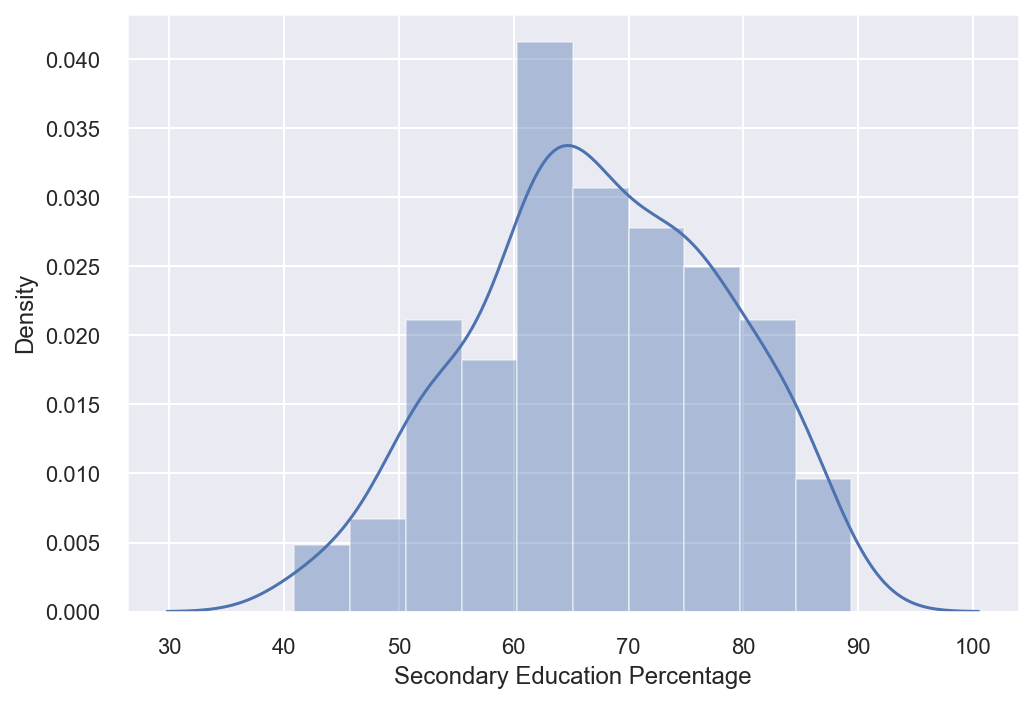

In [19]:
# Histogram of Secondary Education Percentage

sns.distplot(placement['Secondary Education Percentage'],
             kde=True,
             bins=10);


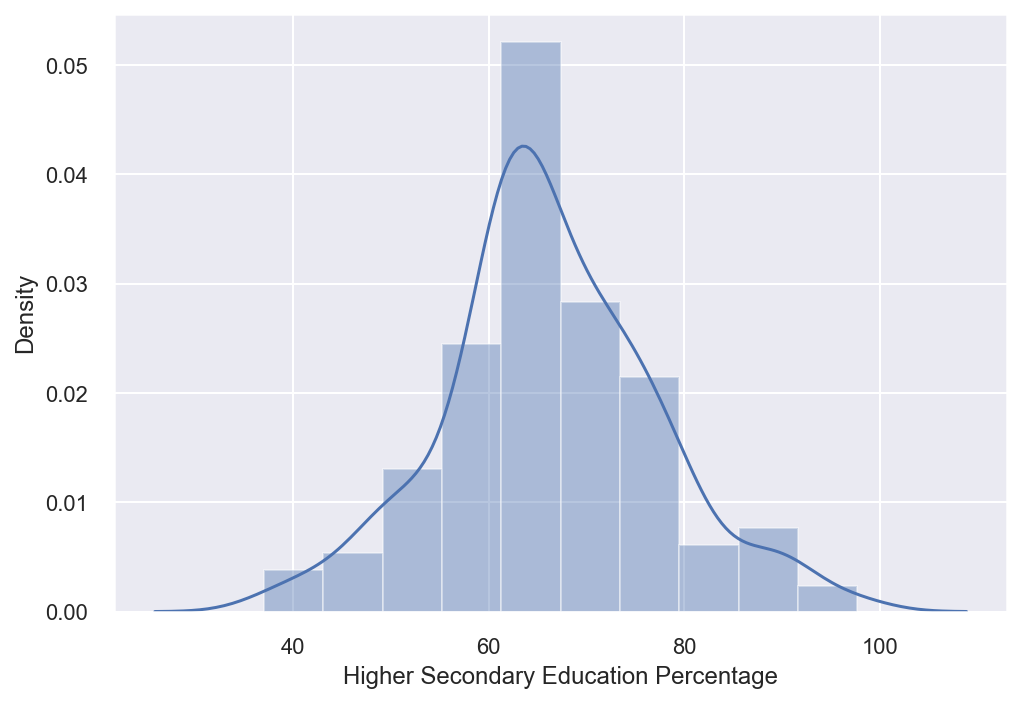

In [20]:
# Histogram of Higher Secondary Education Percentage

sns.distplot(placement['Higher Secondary Education Percentage'],
             kde=True,
             bins=10);

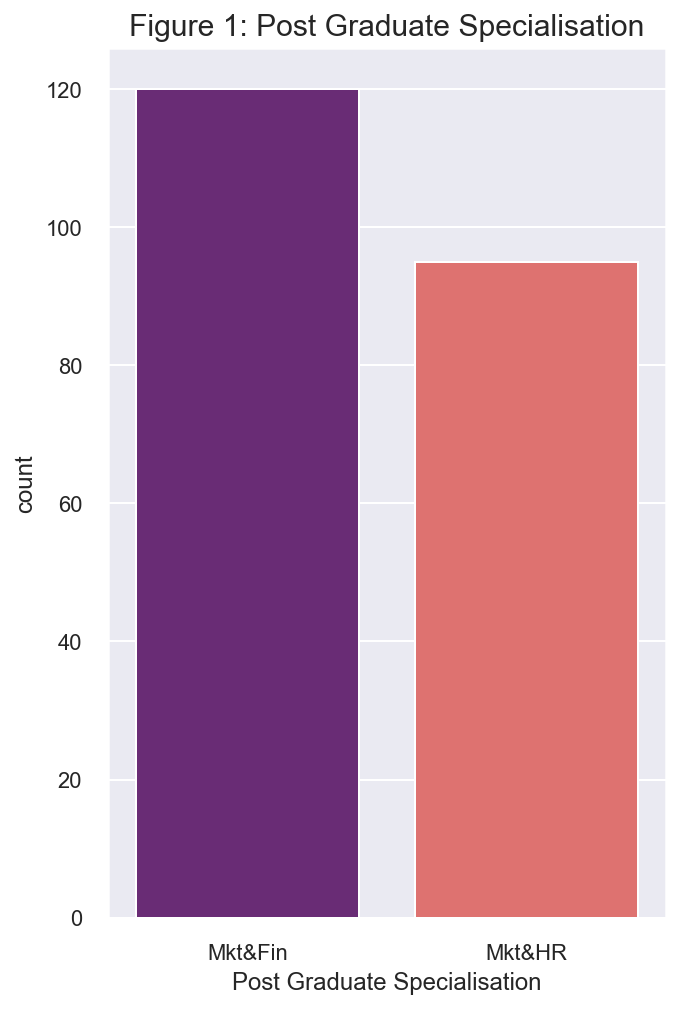

In [35]:
# Bar chart of Post Graduate Specialisation

plt.figure(figsize = (5,8))
fig = sns.countplot(x = 'Post Graduate Specialisation', data = placement, palette = 'magma', 
                    order = placement['Post Graduate Specialisation'].value_counts().index)
fig = plt.title('Figure: Post Graduate Specialisation', fontsize = 15)
plt.show()

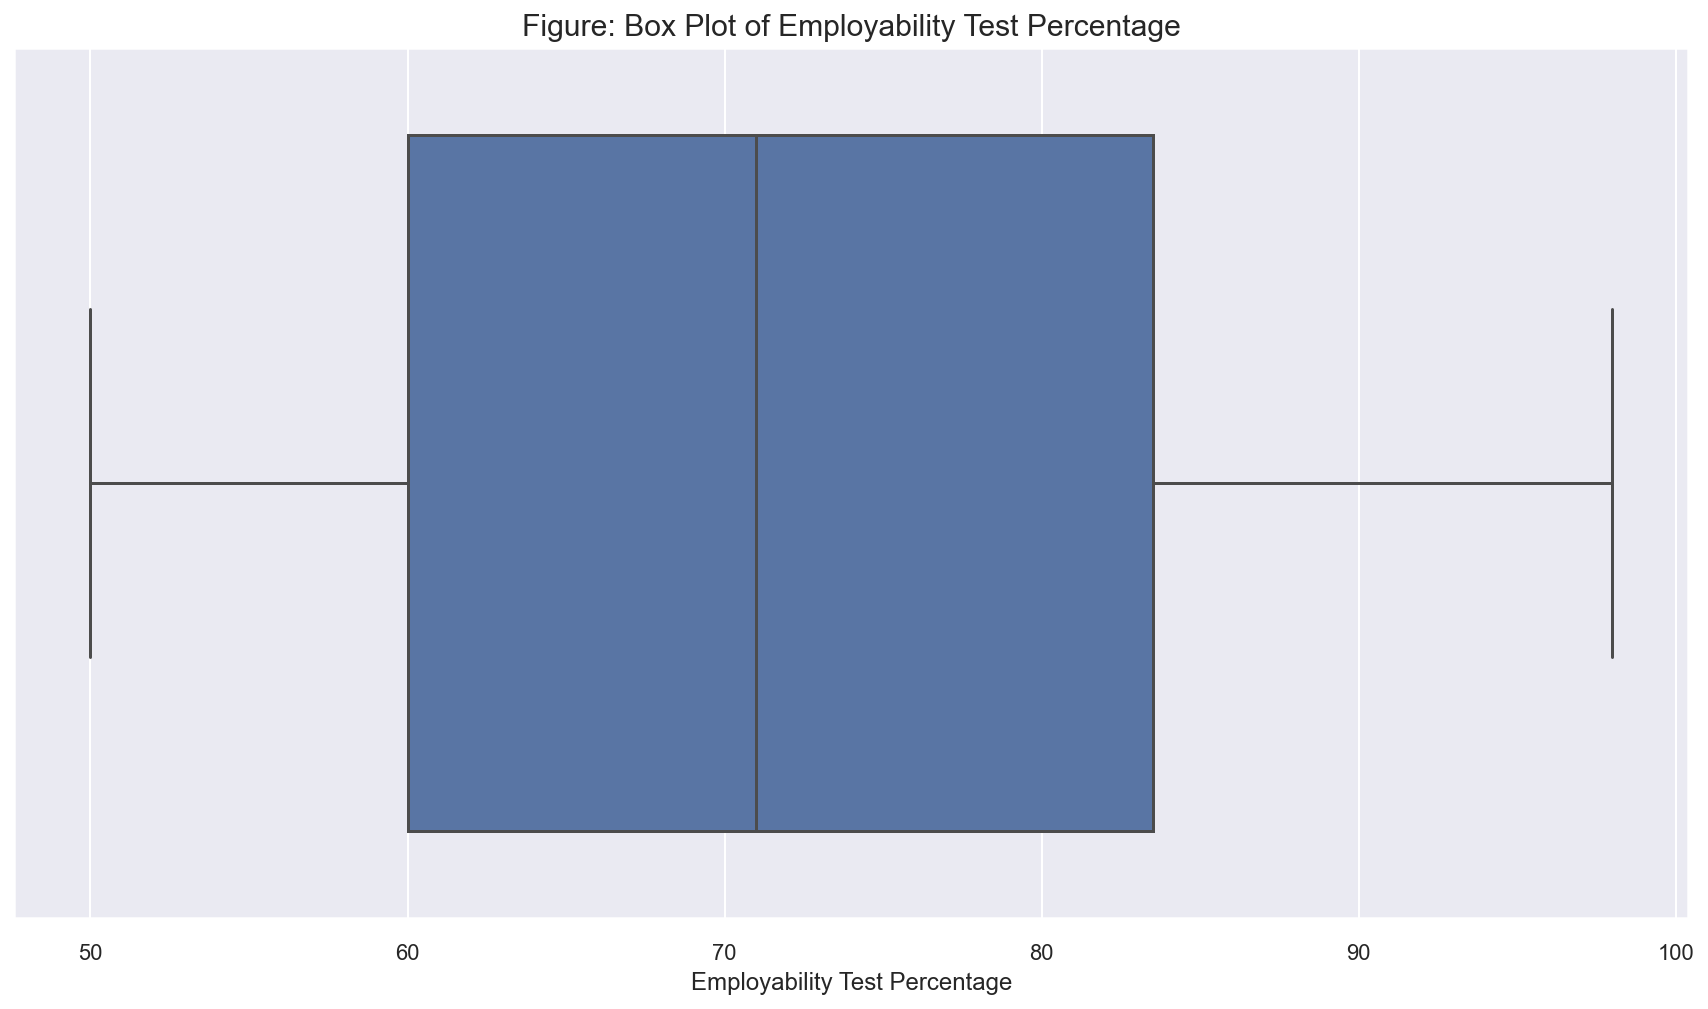

In [37]:
# Boxplot of Employability Test Percentage
plt.figure(figsize = (15,8))
sns.boxplot(placement['Employability Test Percentage']).set_title('Figure: Box Plot of Employability Test Percentage', fontsize = 15)
plt.show();

## Two-variable exploration and visualisation

In [ ]:
# gender and placement Status

<AxesSubplot:xlabel='Gender'>

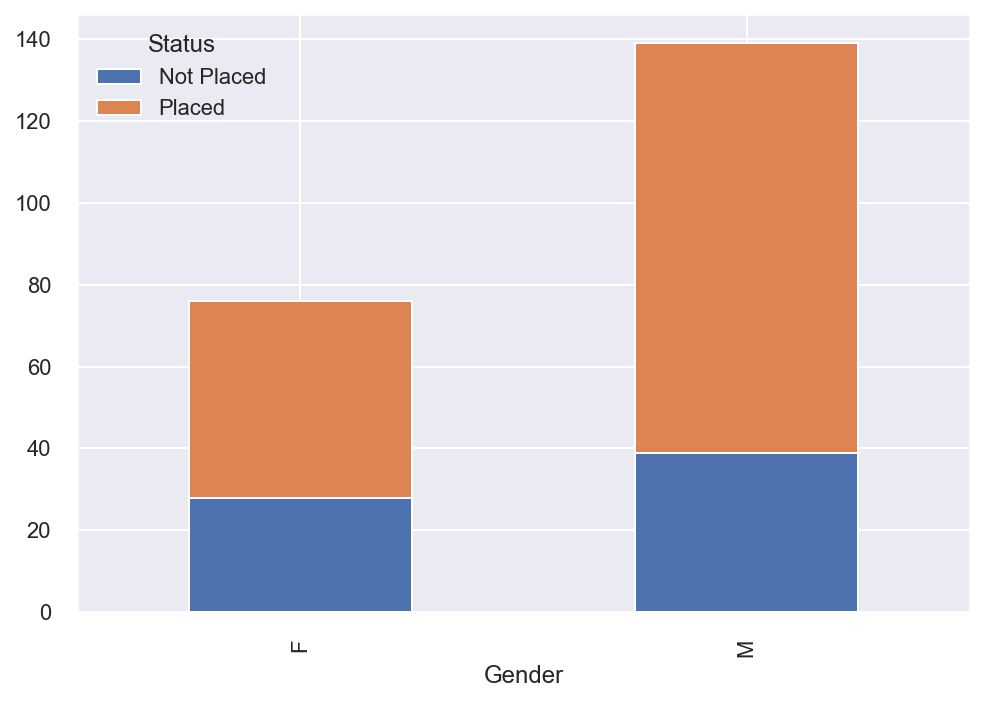

In [62]:
placement.groupby(['Gender','Status']).size().unstack().plot(kind='bar', stacked=True)


In [ ]:
# Higher Secondary Specialisation and Status

<AxesSubplot:xlabel='Higher Secondary Specialisation'>

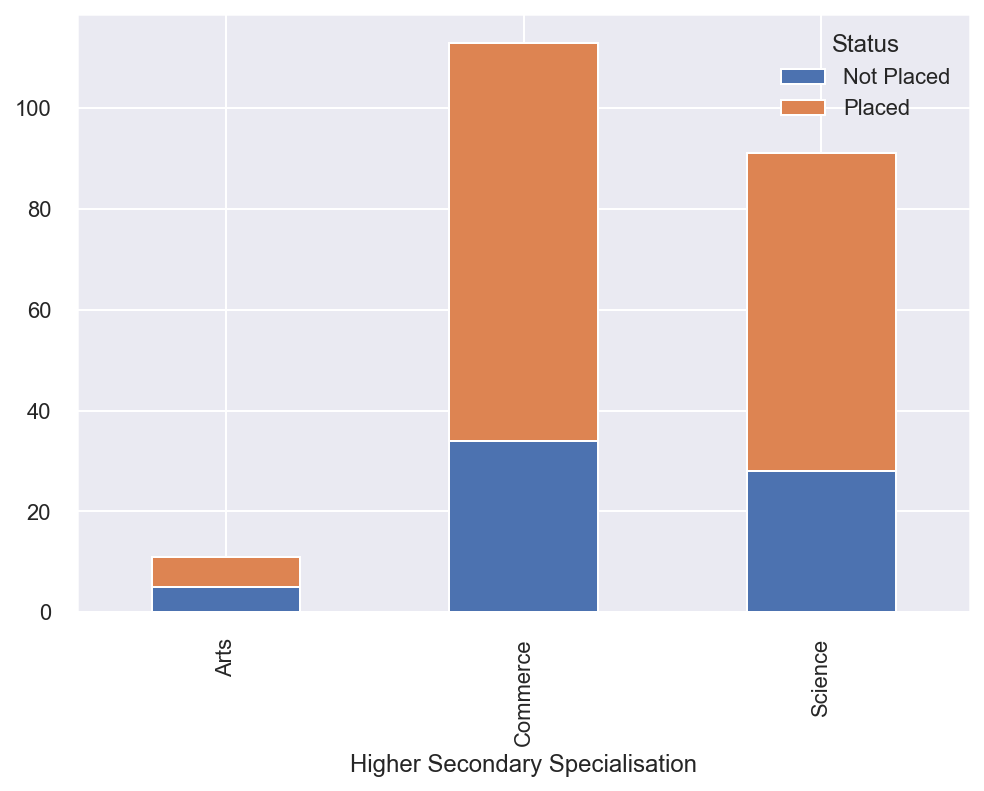

In [63]:
placement.groupby(['Higher Secondary Specialisation','Status']).size().unstack().plot(kind='bar', stacked=True)


In [ ]:
# Undergraduate Degree Type and Status

<AxesSubplot:xlabel='Undergraduate Degree Type'>

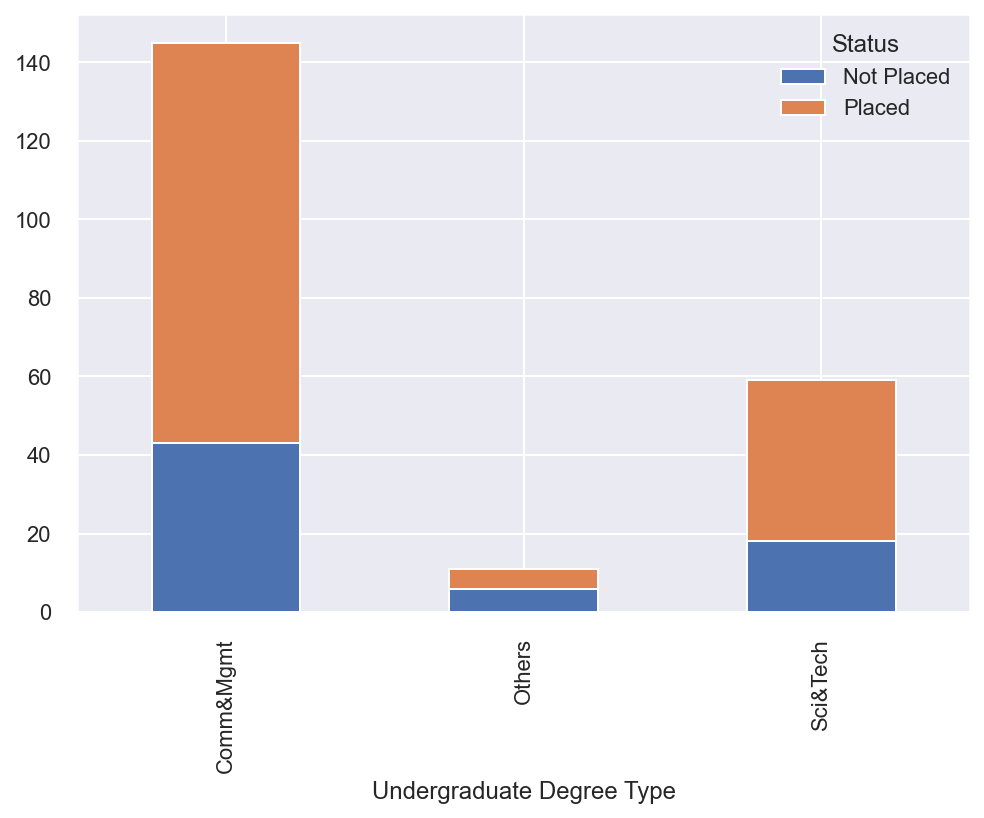

In [65]:
placement.groupby(['Undergraduate Degree Type','Status']).size().unstack().plot(kind='bar', stacked=True)


In [ ]:
# Post Graduate Specialisation and Status

<AxesSubplot:xlabel='Post Graduate Specialisation'>

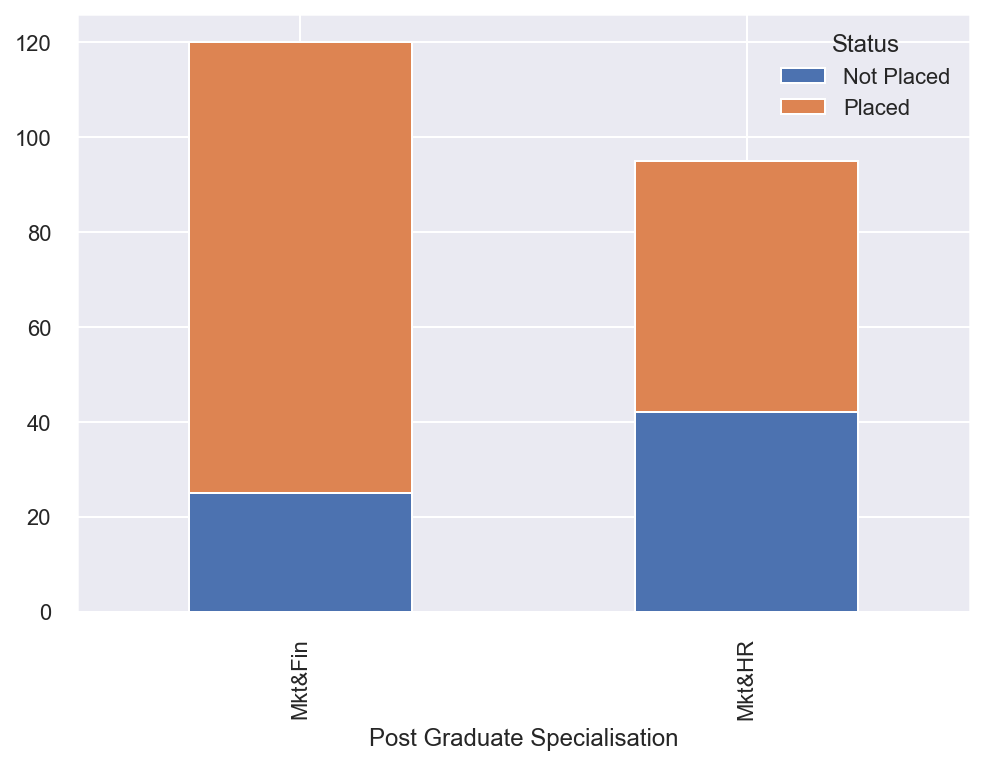

In [66]:
placement.groupby(['Post Graduate Specialisation','Status']).size().unstack().plot(kind='bar', stacked=True)


## Three-variable exploration and visualisation

In [ ]:
# gender, employment score and placement Status

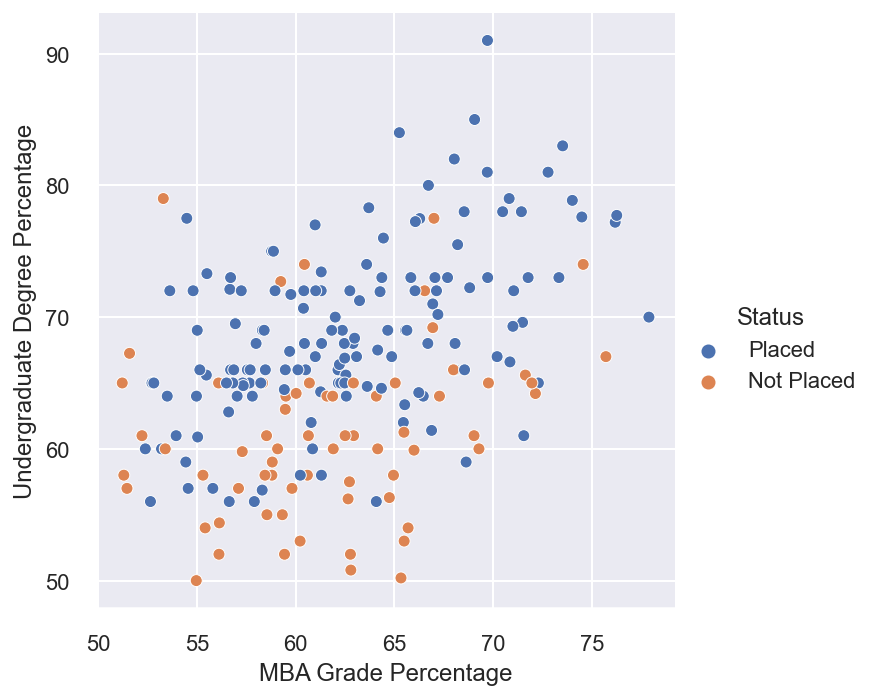

In [80]:
sns.relplot(x="MBA Grade Percentage", 
            y="Undergraduate Degree Percentage", 
            hue="Status", 
            data=placement);

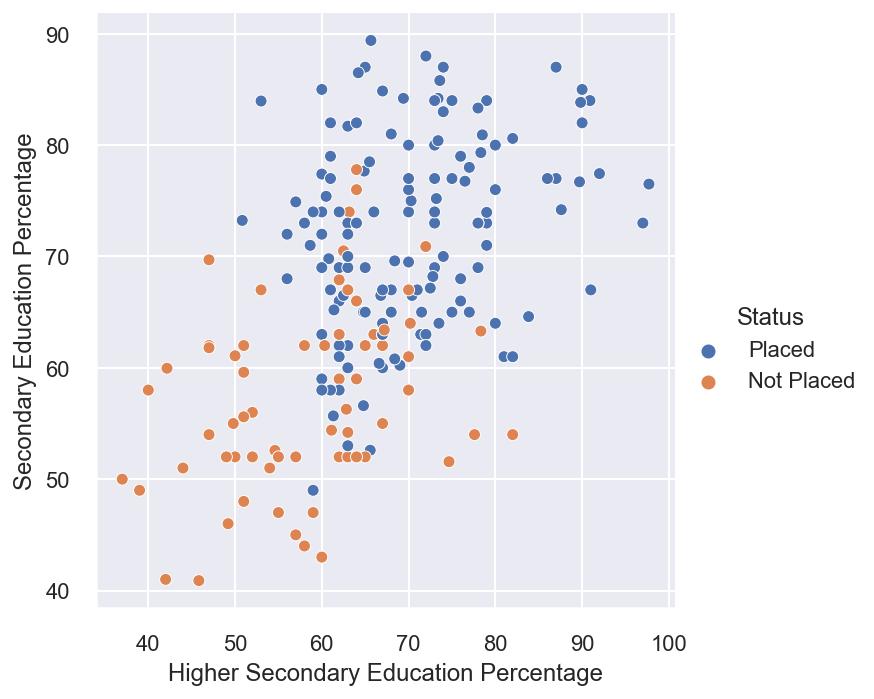

In [78]:
sns.relplot(x="Higher Secondary Education Percentage", 
            y="Secondary Education Percentage", 
            hue="Status", 
            data=placement);

In [ ]:
# Higher Secondary Specialisation, Score and Status

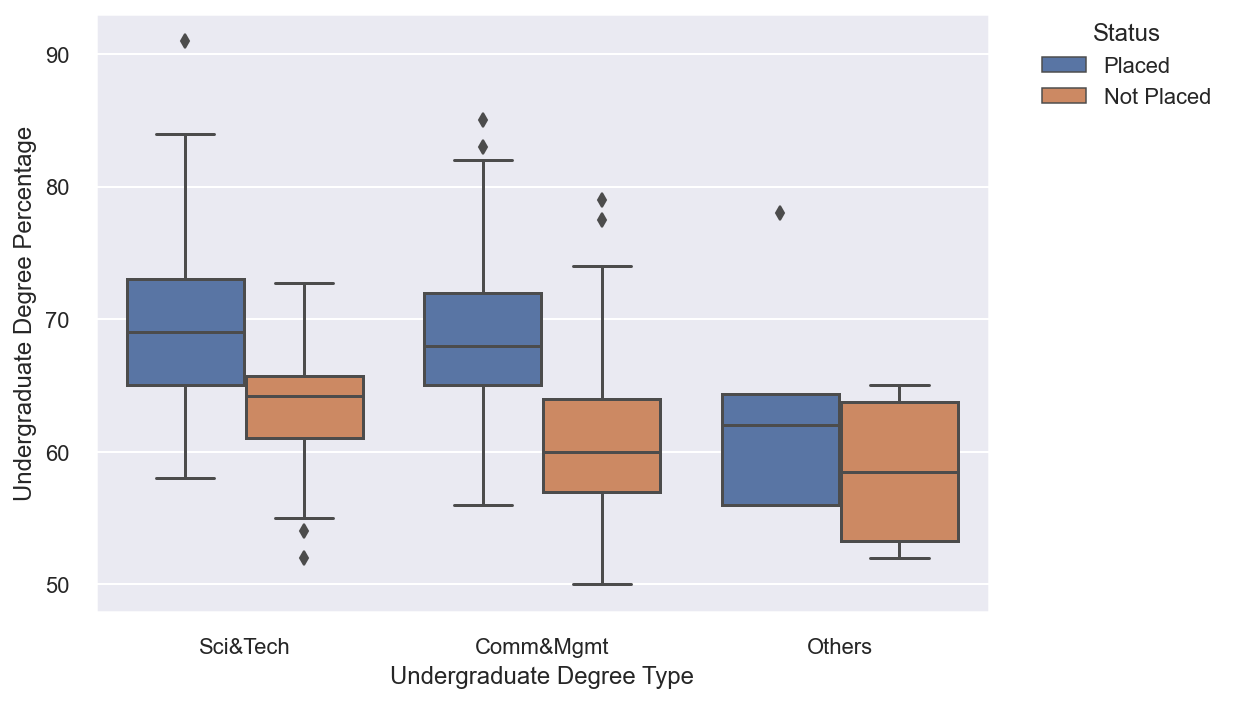

In [79]:
bp=sns.boxplot(x="Undergraduate Degree Type",
               y="Undergraduate Degree Percentage",
               hue="Status", 
               data=placement);

# position the legend outside the chart
bp.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,
          title="Status");

# set the x-axis title
bp.set_xlabel("Undergraduate Degree Type");

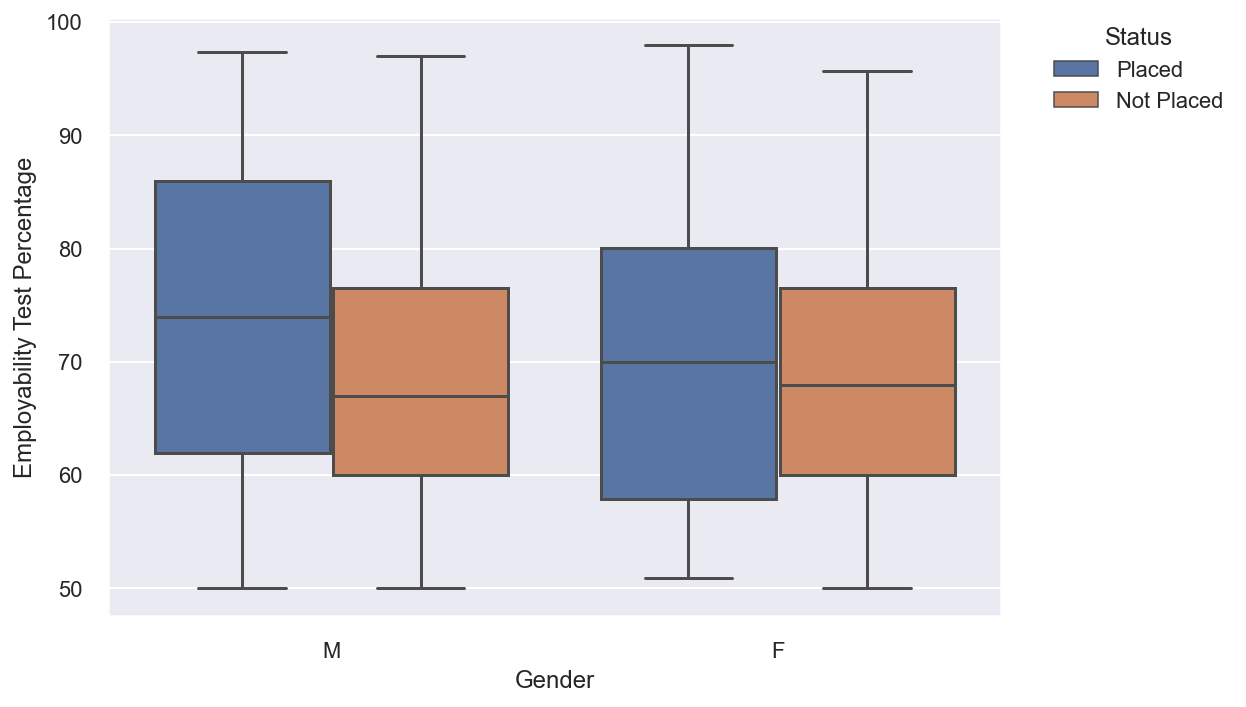

In [82]:
bp=sns.boxplot(x="Gender",
               y="Employability Test Percentage",
               hue="Status",
               data=placement);

# position the legend outside the chart
bp.legend(bbox_to_anchor=(1.05, 1),loc=2, borderaxespad=0.,
          title="Status");

# set the x-axis title
bp.set_xlabel("Gender");

In [ ]:
# Undergraduate Degree Type, undergraduate score and Status

In [ ]:
# Post Graduate Specialisation, MBA score and Status

## Literature Review <a id='lr'></a>
*Advanced submission - 600+ words*

*minimum 10 journal articles and 4 conference papers in a dedicated references section*

## Summary and Conclusions <a id='sum'></a>
*Summarise phase 1 state insights gained*

## References <a id='ref'></a>
Roshan, B. (2020). Campus Recruitment. Retrieved April 3, 2022 from https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement.

*References from advanced submission and report in general*